In [1]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
%pip install ultralytics
!pip install roboflow --quiet
%pip install clearml

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets
from roboflow import Roboflow

rf = Roboflow(api_key="8alt1kWsWIlo930A0quA")
project = rf.workspace("chirag-otenn").project("human-detection-in-thermal")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.14, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Human-Detection-in-Thermal-1 in yolov8:: 100%|██████████| 4306/4306 [00:00<00:00, 5333.42it/s]


In [6]:

%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=0BEQ9KSY152LX8NWYP2N
%env CLEARML_API_SECRET_KEY=JP9MPH219us6fWfecSbjvRD6jVGaXkk7odJKXUclrkES8TjjBM

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=0BEQ9KSY152LX8NWYP2N
env: CLEARML_API_SECRET_KEY=JP9MPH219us6fWfecSbjvRD6jVGaXkk7odJKXUclrkES8TjjBM


In [7]:
from clearml import Task
task = Task.init(project_name='Human_Detection_Thermal_Images', task_name='Yolo_v8_N')

ClearML Task: created new task id=49ea842bcfe249758a08ef1287870858
2024-05-12 20:50:46,094 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/dfc7076fbb8a4f4eb41470c5f03bd6e0/experiments/49ea842bcfe249758a08ef1287870858/output/log


/usr/local/lib/python3.10/dist-packages/clearml/utilities/process/mp.py:622: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



In [9]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=16 imgsz=640 plots=True

/content
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Human-Detection-in-Thermal-1/data.yaml, epochs=16, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

In [10]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1715547375.24139012808e.3474.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch720.jpg	weights
P_curve.png					    train_batch721.jpg
PR_curve.png					    train_batch722.jpg


/content


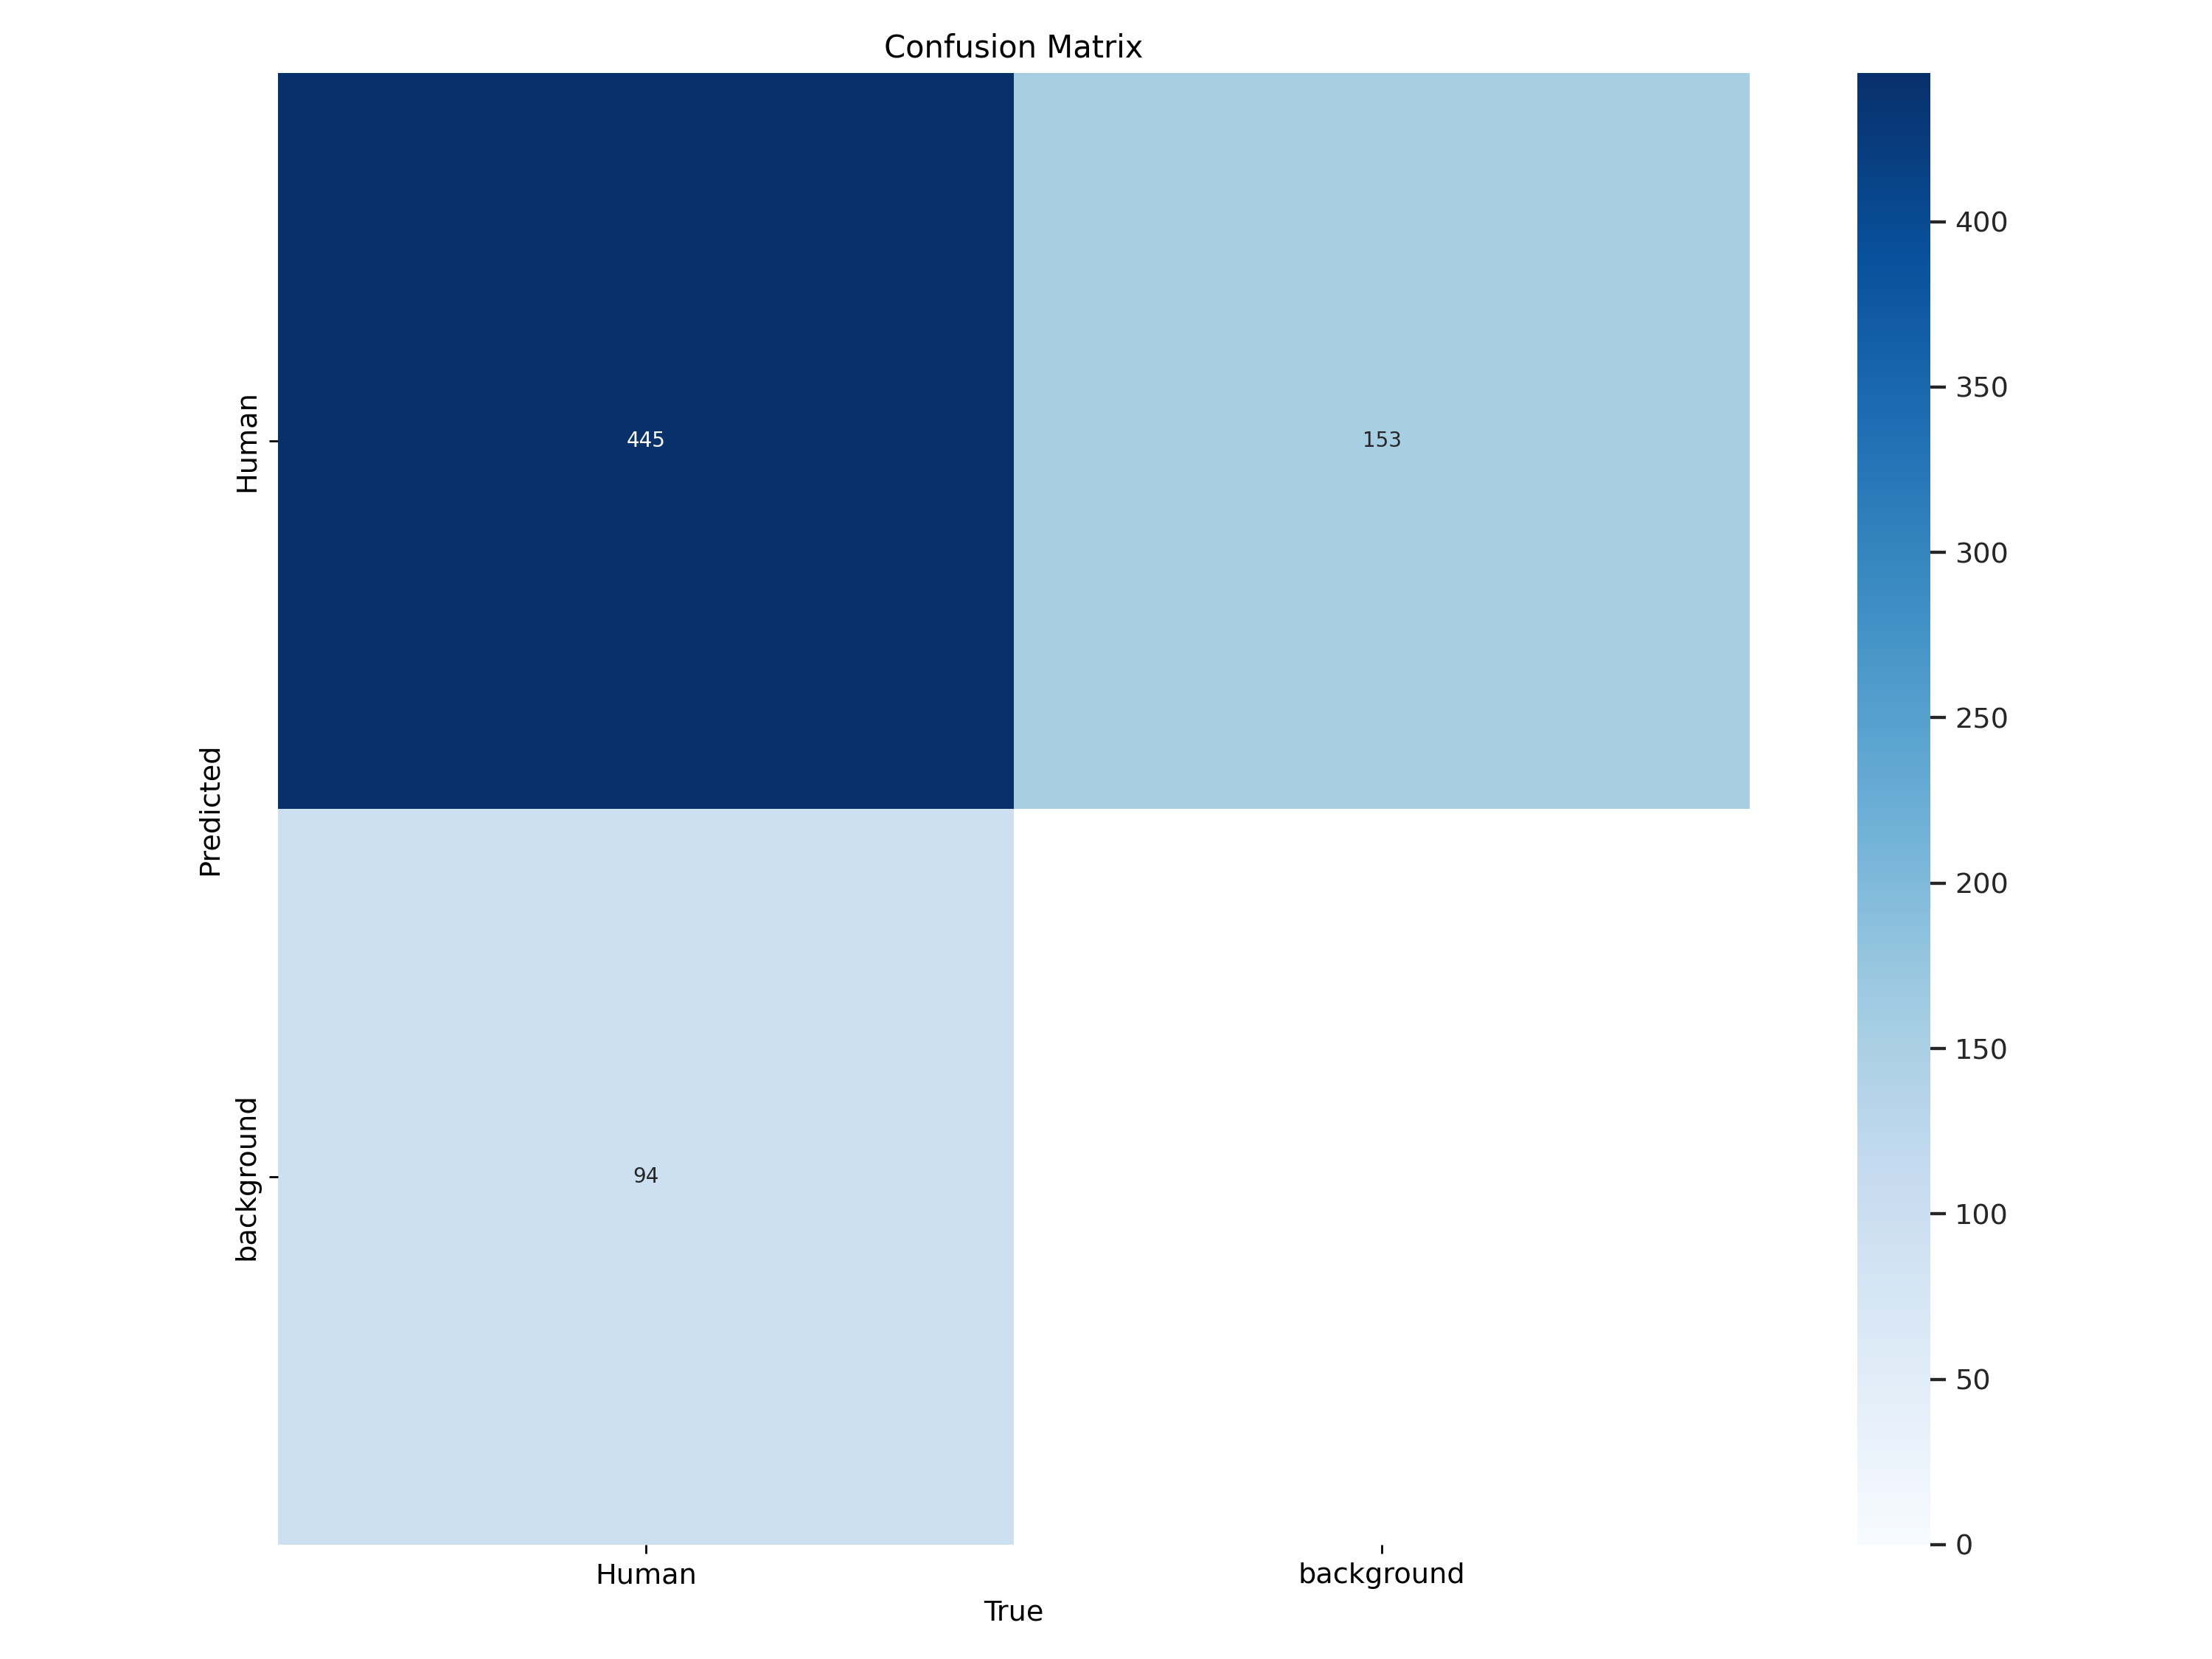

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


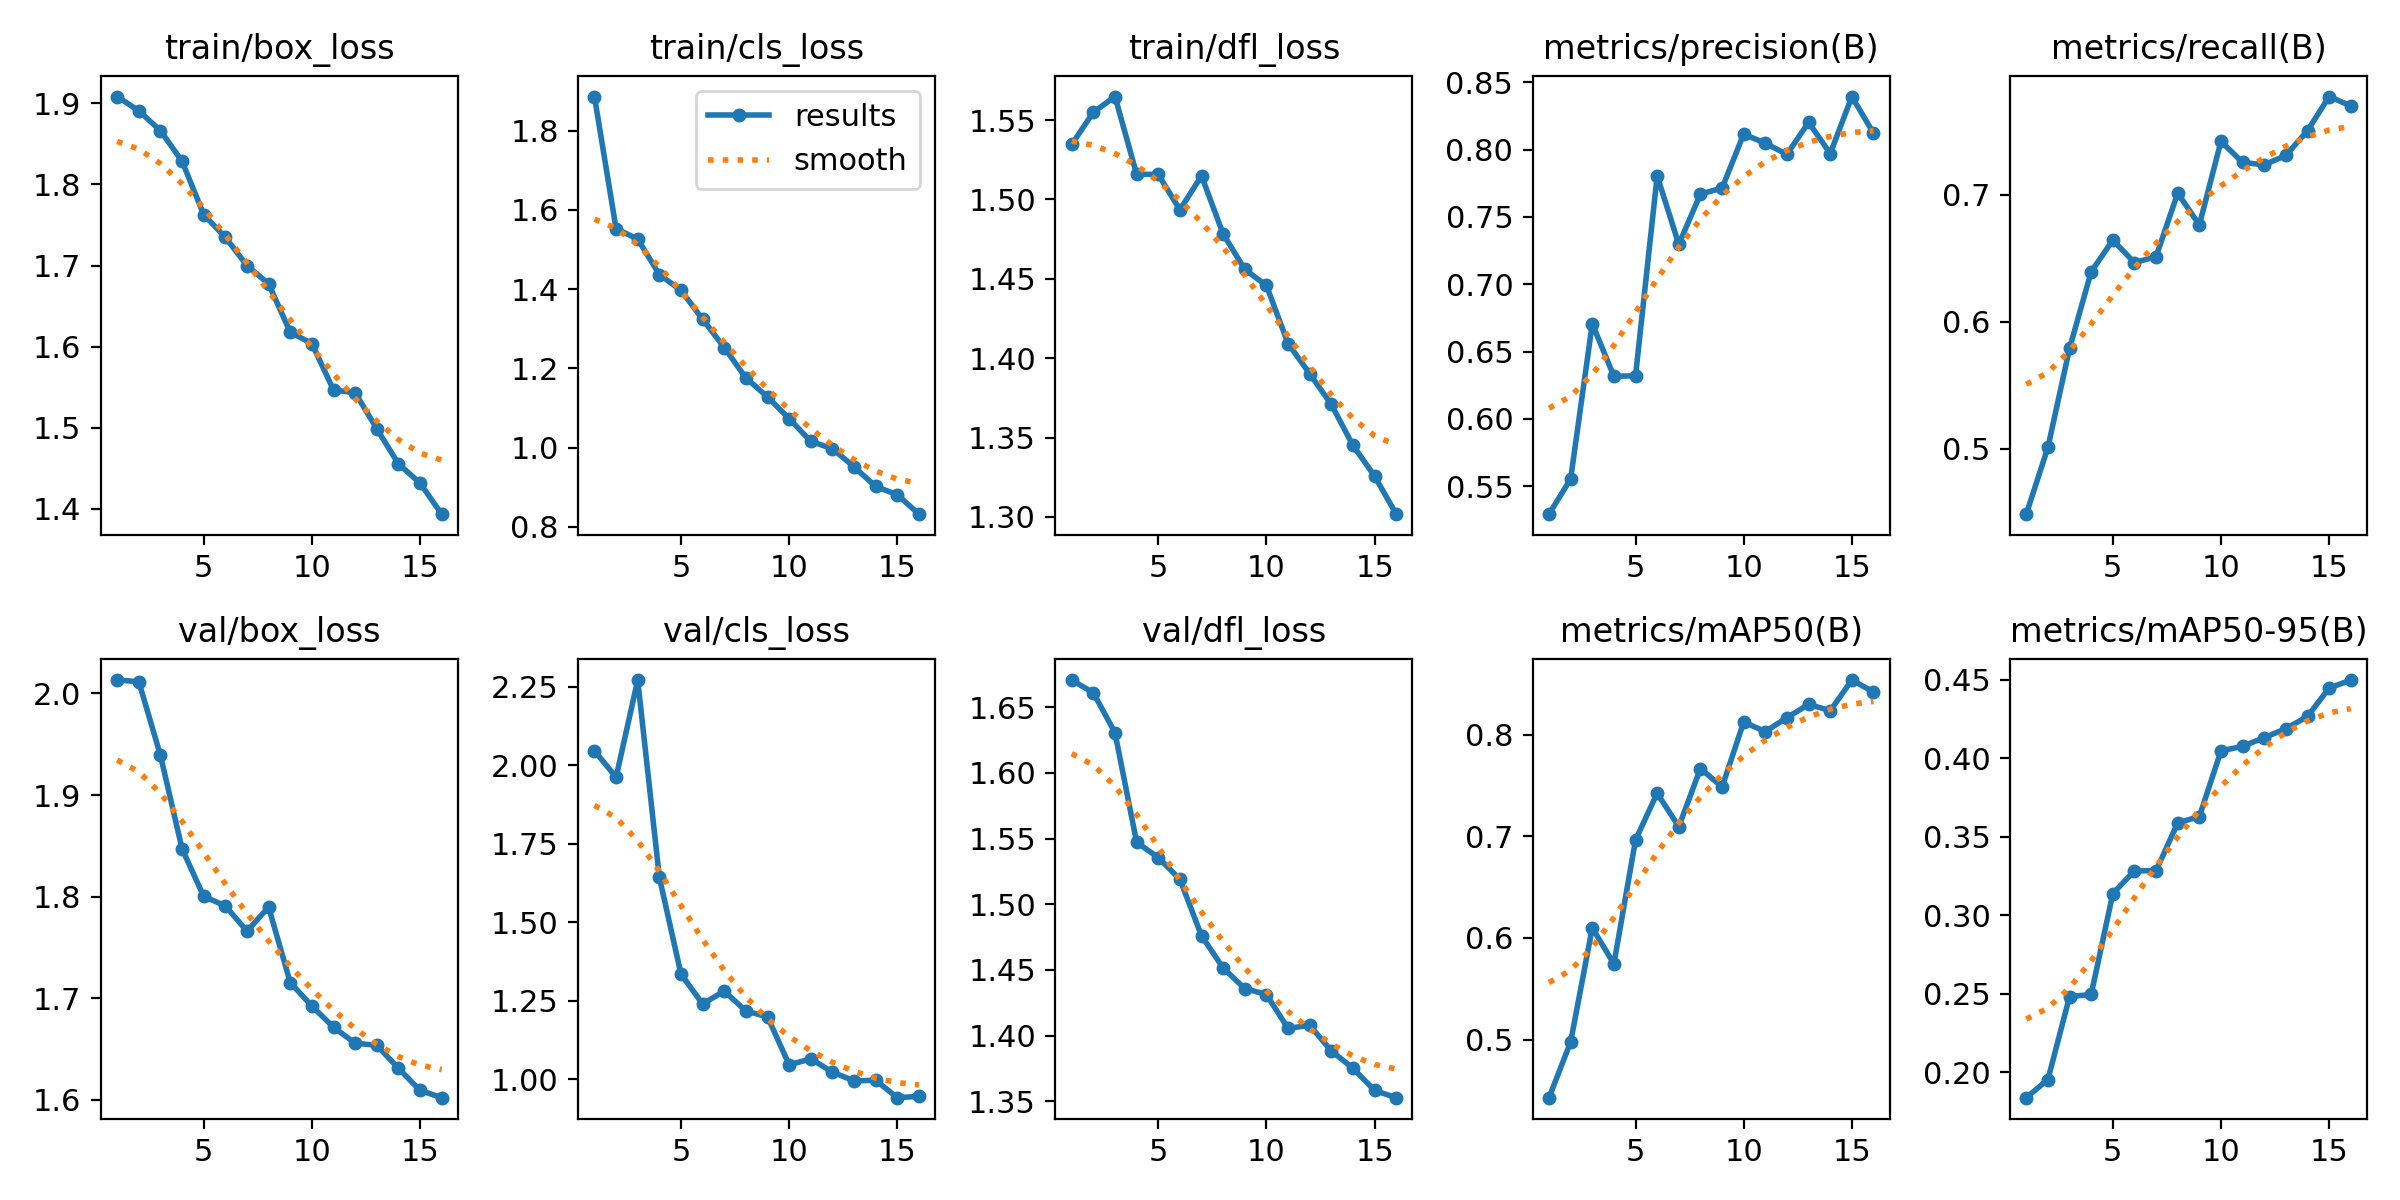

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

In [13]:
# Validation
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Human-Detection-in-Thermal-1/valid/labels.cache... 153 images, 9 backgrounds, 0 corrupt: 100% 153/153 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:09<00:00,  1.07it/s]
                   all        153        539      0.814      0.774      0.843      0.451
Speed: 4.4ms preprocess, 12.0ms inference, 0.0ms loss, 21.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [14]:
# Testing/Inference
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.14 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/74 /content/datasets/Human-Detection-in-Thermal-1/test/images/3_103_jpeg.rf.e616baaa5016cacafb5c86db8bcc814e.jpg: 640x640 2 Humans, 26.0ms
image 2/74 /content/datasets/Human-Detection-in-Thermal-1/test/images/3_82_jpeg.rf.8aa577f6ad6cc824994ae48b45d94fbb.jpg: 640x640 1 Human, 16.5ms
image 3/74 /content/datasets/Human-Detection-in-Thermal-1/test/images/3_94_jpeg.rf.d12f8160b6d877b91bcbae6030b742cd.jpg: 640x640 1 Human, 16.5ms
image 4/74 /content/datasets/Human-Detection-in-Thermal-1/test/images/6_52_jpeg.rf.8f18298fc5e4cb792c2f4e2f32164337.jpg: 640x640 1 Human, 16.4ms
image 5/74 /content/datasets/Human-Detection-in-Thermal-1/test/images/6_55_jpeg.rf.5e1214af1b70015a7af3d7b3905bd304.jpg: 640x640 1 Human, 16.4ms
image 6/74 /content/datasets/Human-Detection-in-Thermal-1/test/images/6_57_jpeg.rf.0302d6efb85a

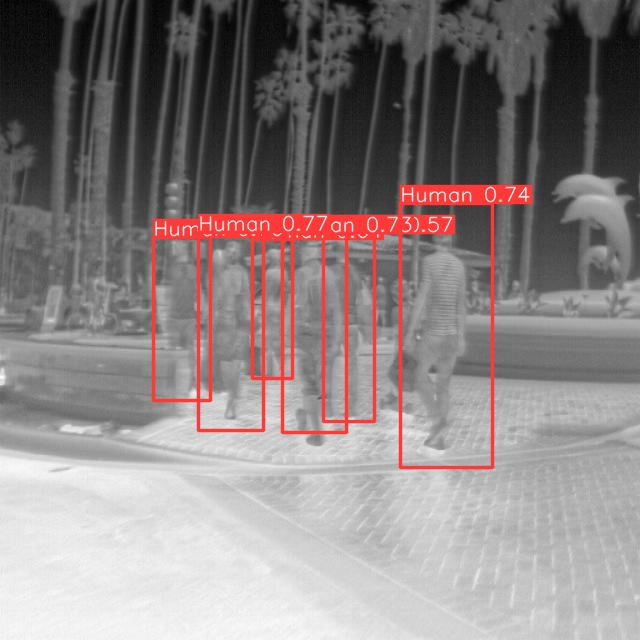

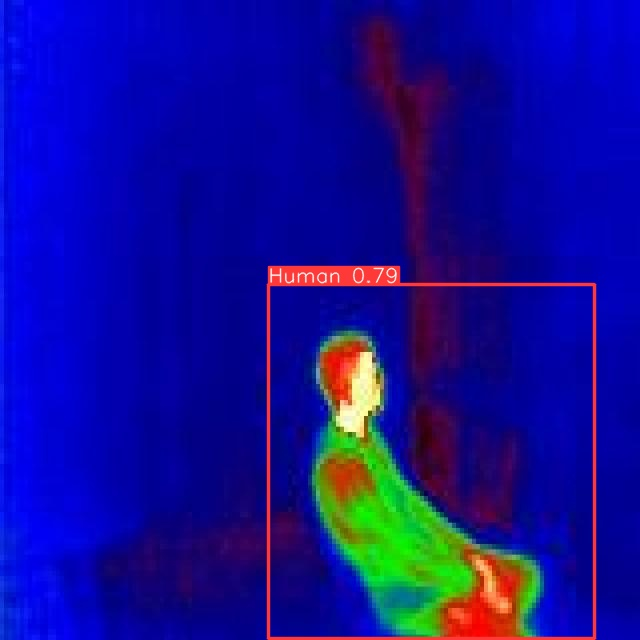

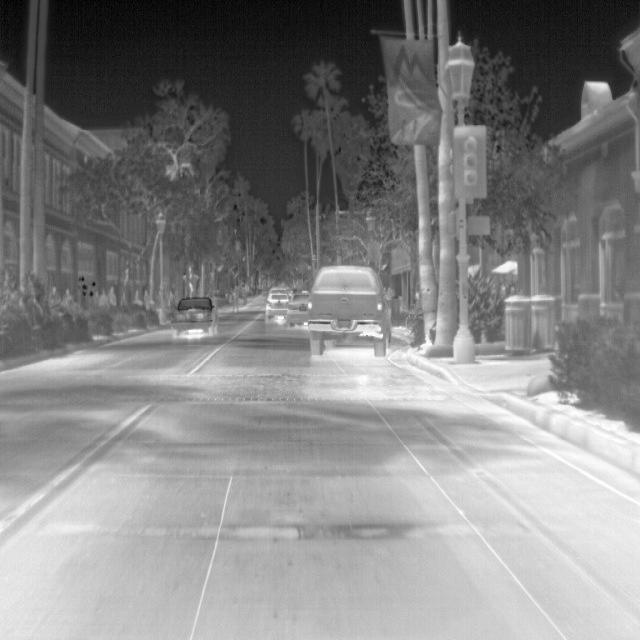

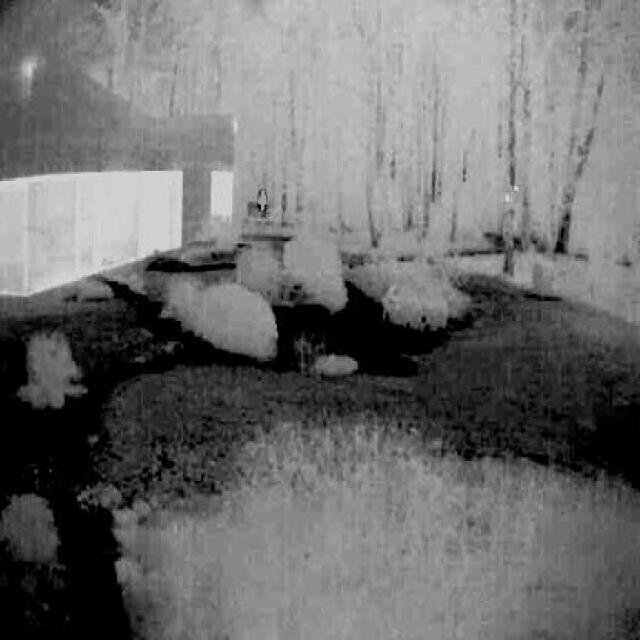

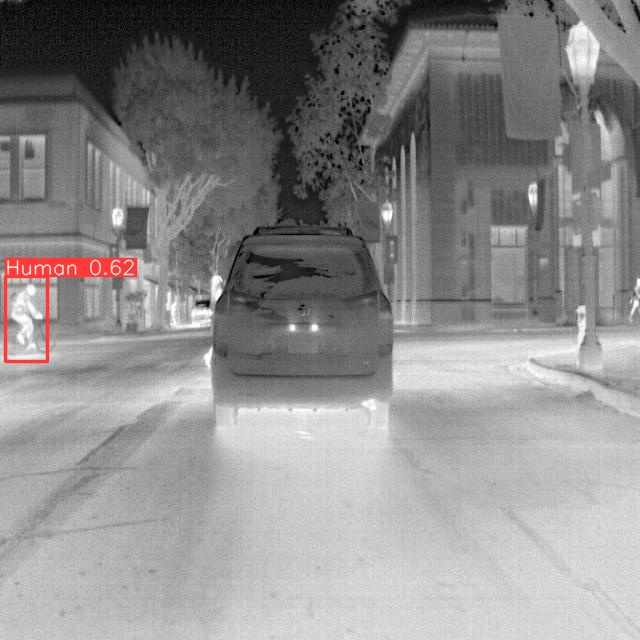

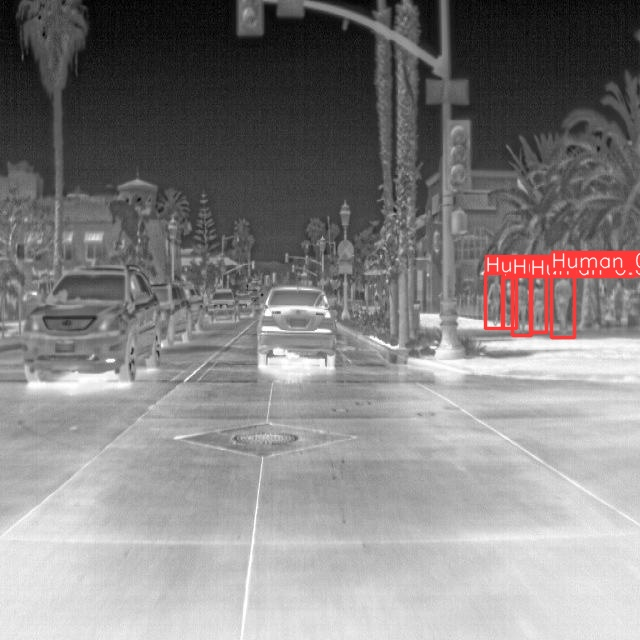

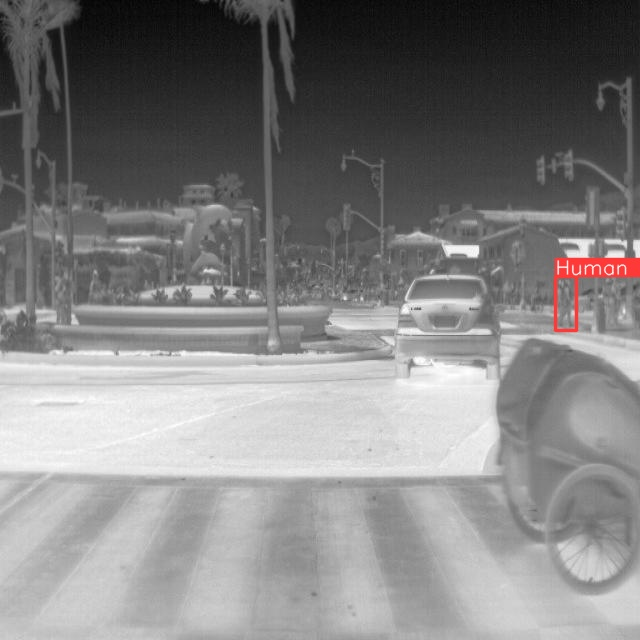

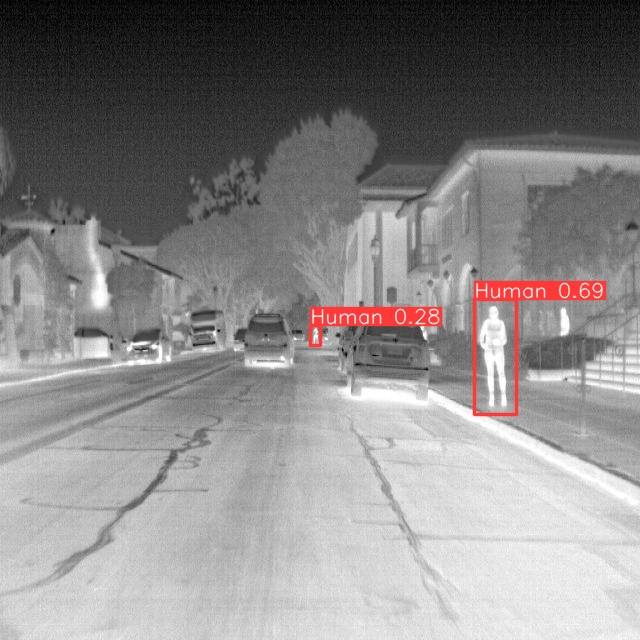

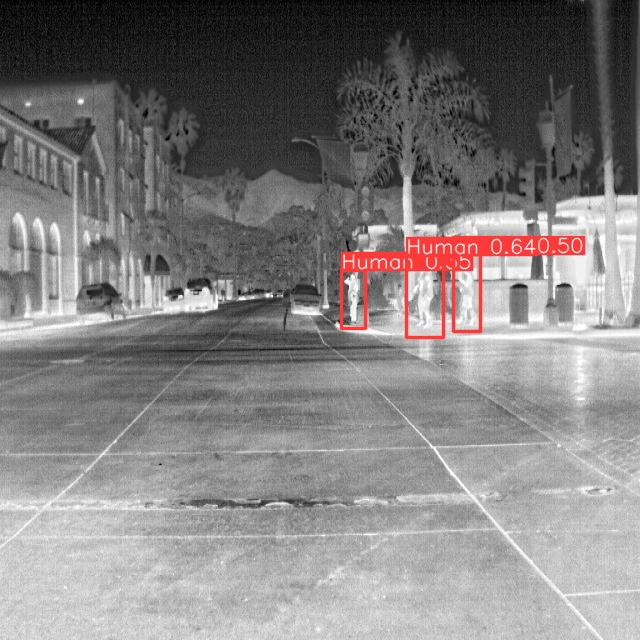

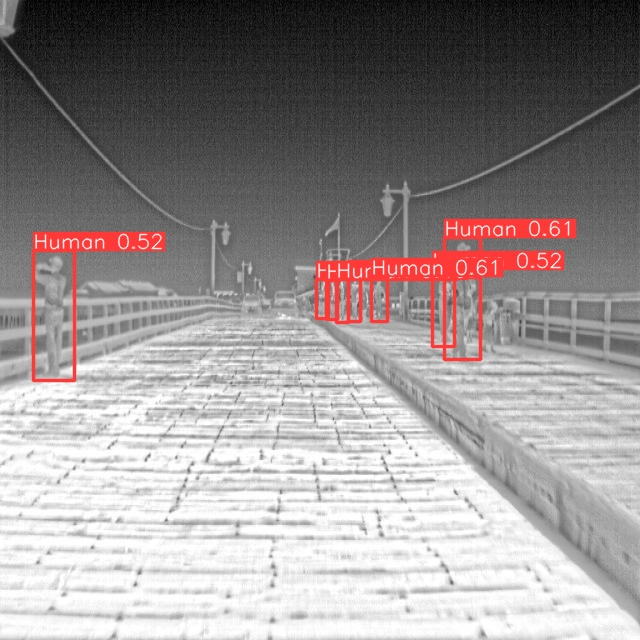

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [16]:
import shutil
import os
import zipfile
directory_to_zip = '/content/runs/'
zip_file_path = '/content/YOLO_v8_N.zip'
with zipfile.ZipFile(zip_file_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(directory_to_zip):
        for file in files:
            zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory_to_zip))

In [17]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [18]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [19]:
!pip install google-api-python-client
from google.colab import auth
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload


auth.authenticate_user()

In [20]:
drive_service = build('drive', 'v3')

In [21]:
file_metadata = {'name': 'YOLO_v8_N.zip'}
media = MediaFileUpload(zip_file_path, resumable=True)
file = drive_service.files().create(body=file_metadata, media_body=media, fields='id').execute()
print(f"Uploaded '{zip_file_path}' to Google Drive with ID: {file.get('id')}")

Uploaded '/content/YOLO_v8_N.zip' to Google Drive with ID: 1a7wMEF5UKpVMgM1CrHlaPbjyGq6ffN46
